In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

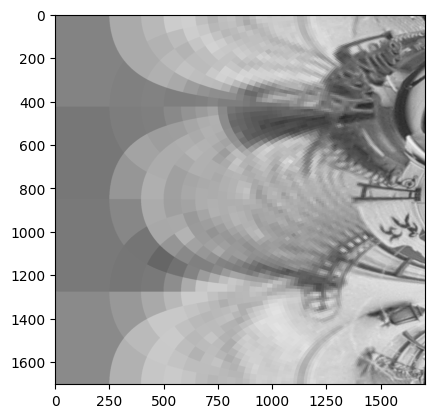

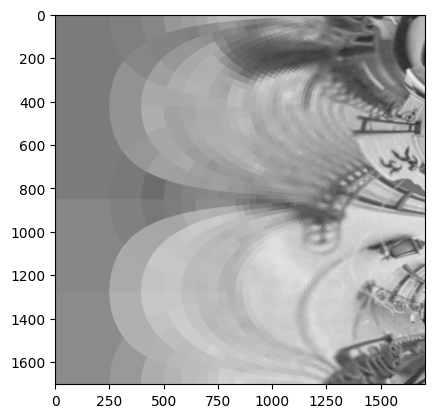

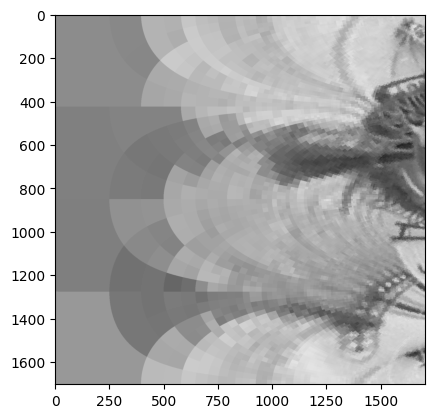

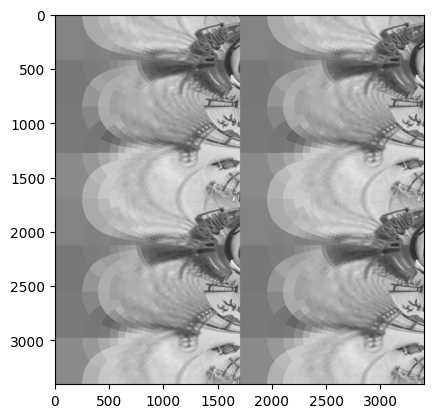

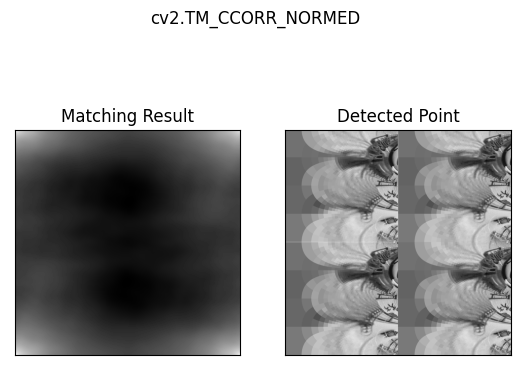

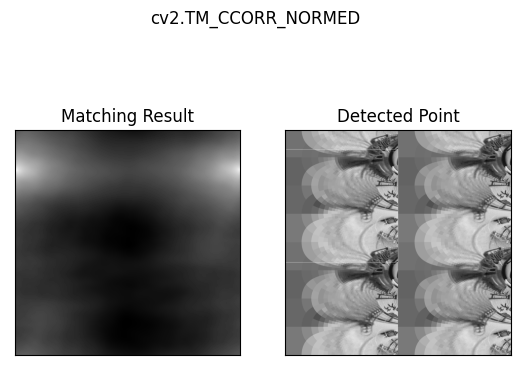

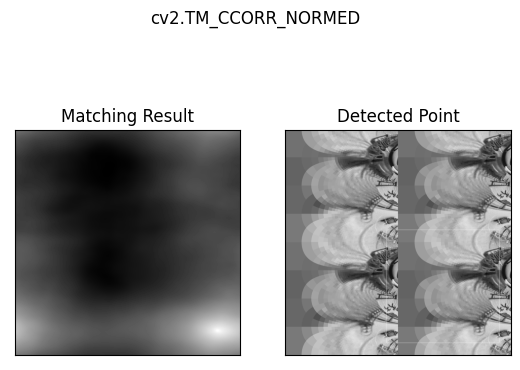

In [4]:
own = cv2.imread('../images/cc_log_polar/main.jpg',0)

own_final = cv2.imread('../images/cc_log_polar/main_rotscale.jpg',0)
width = int(own.shape[1])
height = int(own.shape[0])
center = (width/2, height/2)
dim=(width,height)

###Setting up our data###
#set our rotation
w, h = own.shape[::-1]
Mlimit = cv2.getRotationMatrix2D((w/2,h/2), 65, 1)
#rotate image

own_rotlim = cv2.warpAffine(own, Mlimit, (w, h))

#cv2.imshow('own',own_final)

#Get logpolar
own = cv2.logPolar(own,center,360,cv2.WARP_FILL_OUTLIERS)
own_rotlim = cv2.logPolar(own_rotlim,center,360,cv2.WARP_FILL_OUTLIERS)
#own_reslim = cv2.logPolar(own_reslim,center,360,cv2.WARP_FILL_OUTLIERS)
own_final= cv2.logPolar(own_final,center,360,cv2.WARP_FILL_OUTLIERS)


own1=np.concatenate((own, own), axis=0)
own2=np.concatenate((own, own), axis=0)
main=np.concatenate((own1, own2), axis=1)

plt.imshow(own, cmap='gray', vmin=0, vmax=255)
plt.show()
#plt.imshow(own_reslim, cmap='gray', vmin=0, vmax=255)
#plt.show()
plt.imshow(own_rotlim, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(own_final, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(main, cmap='gray', vmin=0, vmax=255)
plt.show()

methods = ['cv2.TM_CCORR_NORMED'] #setting methods.
sample=['own','own_rotlim','own_final'] #choosing which picture will be used.
for meth in methods:
    for pictures in sample:
        
        mainimg = main.copy()
        method = eval(meth)
        picture= eval(pictures)
        
        # Apply template Matching
        res = cv2.matchTemplate(mainimg,picture,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)

        cv2.rectangle(mainimg,top_left, bottom_right, 255, 2)

        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(mainimg,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)

        plt.show()


On the one hand log polar coordinate are really effective with rotated pictures. No matter the rotation cross-correlation will still manage to properly match pictures together, when applying rotation on one picture it will change the location of the cross-correlation on the Y axis. when a scale is applied on a picture it will change the cross-correlation location on the X axis. 

On the other hand It's better to use log polar coordinate when dealing with rotated or scaled pictures but when we have untouched pictures we will loose speed because we are forced to  use  a mosaic. Lastly the rotation and scaling needs to be done from the center of the picture which can be quite problematic when we try to match "random" pictures together. 